<a href="https://colab.research.google.com/github/ProfessorQu/Reinforcement-Learning/blob/main/Exercise_2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2.5
Design and conduct an experiment to demonstrate the
diculties that sample-average methods have for nonstationary problems. Use a modified
version of the 10-armed testbed in which all the q*(a) start out equal and then take
independent random walks (say by adding a normally distributed increment with mean 0
and standard deviation 0.01 to all the q*(a) on each step). Prepare plots like Figure 2.2
for an action-value method using sample averages, incrementally computed, and another
action-value method using a constant step-size parameter, alpha = 0.1. Use epsilon = 0.1 and
longer runs, say of 10,000 steps.

## Summary
- Create a bandit with 10 arms;
- Instantiate q*(a) = 0 for all a, then take random walks for each a (normal distribution, mean=0, deviation=0.01);
- Use the sample average technique and a bandit with alpha = 0.1;
- Create all the tests with epsilon = 1;

In [ ]:
# Import and instantiate all the data
import numpy as np
import matplotlib.pyplot as plt

n_bandits = 1000
n_steps = 1000

R = [0 for _ in range(10)]
 
print("n_steps:", n_steps)
print("n_bandits:", n_bandits)
print("\nrandom:", random)
print("R:", R)

n_steps: 1000
n_bandits: 1000

random: True
R: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# Create the bandit object
class Bandit(object):
  def __init__(self, k=10, epsilon=0.1, alpha=None):
    # Initialize all the variables
    self.k = k
    self.epsilon = epsilon

    self.Q = [0 for _ in range(self.k)]
    self.N = [0 for _ in range(self.k)]

    if alpha is None:
      self.alpha = lambda a: 1/self.N[a]
    else:
      self.alpha = alpha
    
    self.random = random
  
  def _choose_action(self):
    # If random number < epsilon -> select random action
    if np.random.uniform(0, 1) < self.epsilon:
      action = np.random.randint(self.k)
    # Otherwise -> select the 'best' action (according to our estimations)
    else:
      action = np.argmax(self.Q)
    
    # Return the chosen action
    return action

  def step(self):
    # Choose an action and update the Q value
    a = self._choose_action()

    self.N[a] += 1
    self.Q[a] += self.alpha(a) * (R[a] - self.Q[a])

    return R[a]

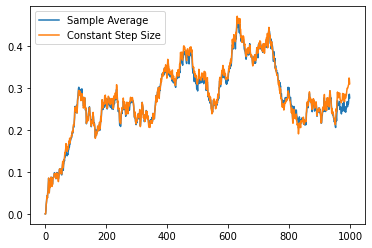

In [ ]:
# Create the bandits
sample_avg_bandits = [Bandit() for _ in range(n_bandits)]
constant_bandits = [Bandit(alpha=lambda a: 0.1) for _ in range(n_bandits)]

x = [i for i in range(n_steps)]

# Get the rewards
sample_avg_r = [0 for _ in range(n_steps)]
constant_r = [0 for _ in range(n_steps)]

# Run with the number of steps
for i in range(n_steps):
  # Run sample average bandits
  for bandit in sample_avg_bandits:
    sample_avg_r[i] += bandit.step()
  
  # Run all constant alpha bandits
  for bandit in constant_bandits:
    constant_r[i] += bandit.step()

  # Get the average of all the bandits
  sample_avg_r[i] /= n_bandits
  constant_r[i] /= n_bandits

  # Take random walks
  if random:
    for action in range(5):
      R[action] += np.random.normal(0, 0.01) 

# Plot the results
plt.plot(x, sample_avg_r)
plt.plot(x, constant_r)
plt.legend(["Sample Average", "Constant Step Size"])
plt.show()